# Прогноз оттока клиентов фитнес-центров «Культурист-датасаентист», рекомендации по удержанию клиентов

**Задача:** Провести анализ причин оттока клиентов из фитнес-центров и подготовить план действий по удержанию клиентов.  
  
**Этапы работы:**  
  
1. Загрузить данные  
  
2. Провести исследовательский анализ данных (EDA)  
  
•	Изучить датасет: есть ли в нем отсутствующие признаки, изучить средние значения и стандартные отклонения  
•	Изучить средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался  
•	Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток) 
•	Построить матрицу корреляций и отобразить ее    
  
3. Построить модель прогнозирования оттока клиентов  
  
Построить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:  
•	Разбить данные на обучающую и валидационную выборку функцией train_test_split().  
•	Обучить модель на train-выборке двумя способами:  
  
-	логистической регрессией,  
-	случайным лесом.  
  
•	Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Какая модель показала себя лучше на основании метрик?  
Указать параметр random_state при разделении выборки и задании алгоритма.  
  
4. Сделать кластеризацию клиентов  
  
Отложить в сторону столбец с оттоком и провести кластеризацию объектов (клиентов):  
•	Стандартизировать данные.  
•	Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположить, какое количество кластеров можно выделить.  
•	Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов.    
•	Изучить средние значения признаков для кластеров. Можно ли сразу что-то заметить?  
•	Построить распределения признаков для кластеров. Можно ли что-то заметить по ним?  
•	Для каждого полученного кластера посчитать долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?  
  
5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами.    
  


## Загрузим данные

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

## Проведем исследовательский анализ данных (EDA)

###### Изучим датасет: есть ли в нем отсутствующие признаки, изучить средние значения и стандартные отклонения

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**Набор данных включает следующие поля:**  
  
•	'Churn' — факт оттока в текущем месяце;  
•	Текущие поля в датасете:  
  
-	Данные клиента за предыдущий до проверки факта оттока месяц:  
  
	'gender' — пол;  
	'Near_Location' — проживание или работа в районе, где находится фитнес-центр;  
	'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
	Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
	'Phone' — наличие контактного телефона;  
	'Age' — возраст;  
	'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах). 
  
•	Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:  
  
-	'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
-	'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);  
-	'Group_visits' — факт посещения групповых занятий;  
-	'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;  
-	'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;  
-	'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.  


**Вывод:**  
Отсутствующих признаков нет.   
С данными можно работать.  

###### Изучим средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [6]:
df_churn = df.groupby('Churn').mean()
display(df_churn)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


###### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [7]:
# создадим список колонок 
list_columns = df.columns.tolist()
display(list_columns[:-1])

['gender',
 'Near_Location',
 'Partner',
 'Promo_friends',
 'Phone',
 'Contract_period',
 'Group_visits',
 'Age',
 'Avg_additional_charges_total',
 'Month_to_end_contract',
 'Lifetime',
 'Avg_class_frequency_total',
 'Avg_class_frequency_current_month']

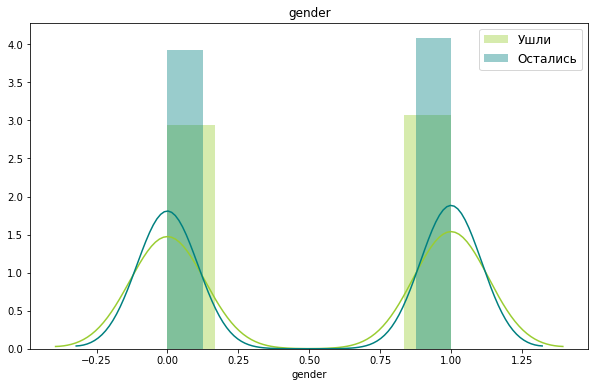

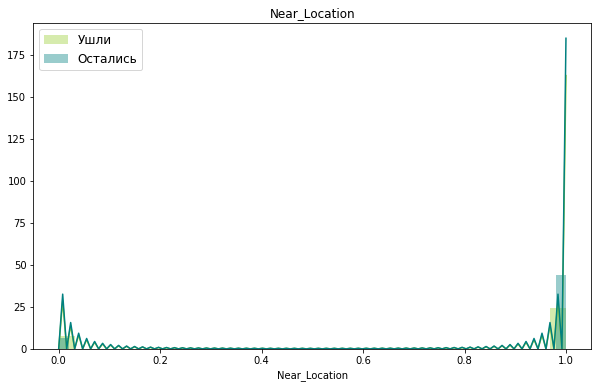

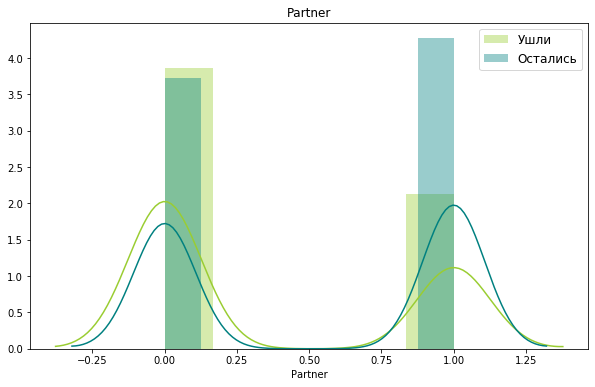

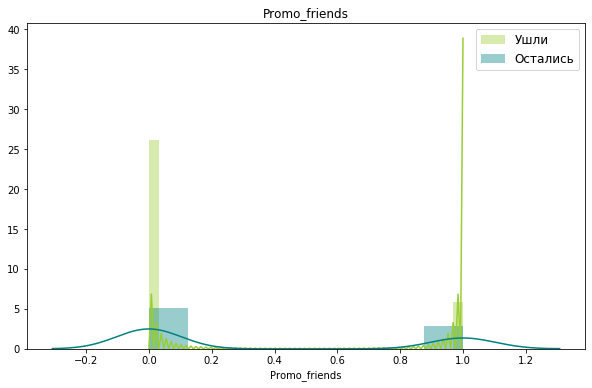

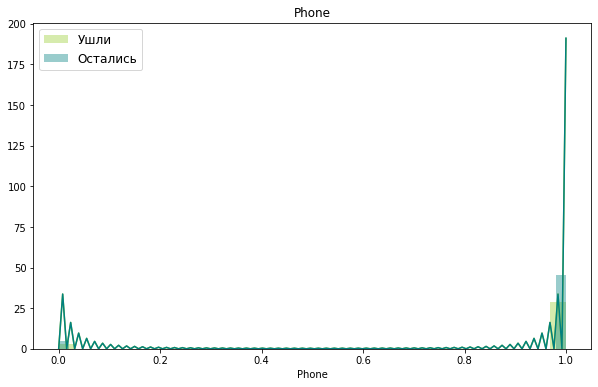

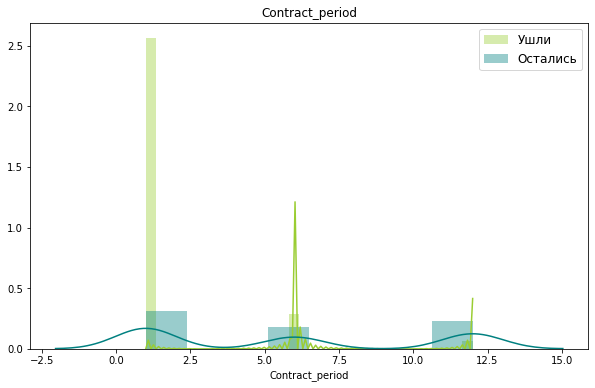

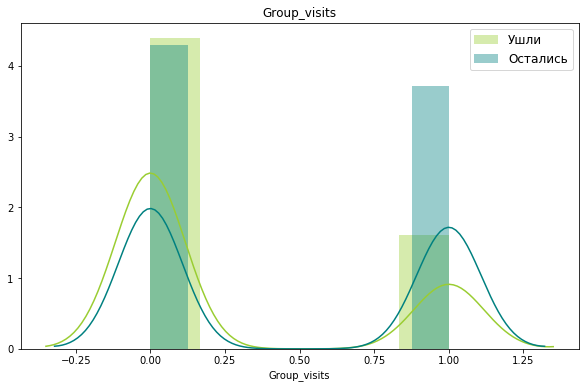

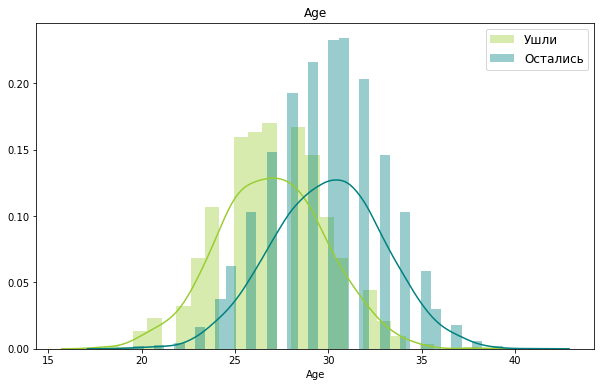

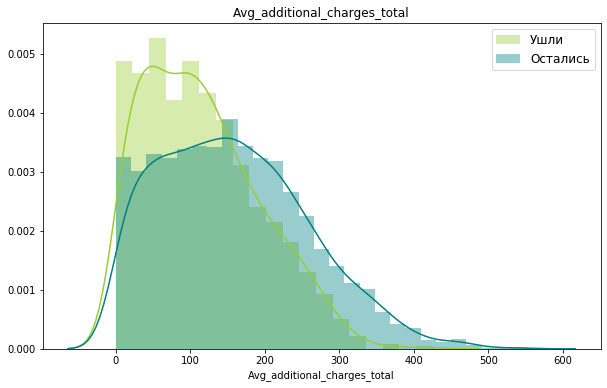

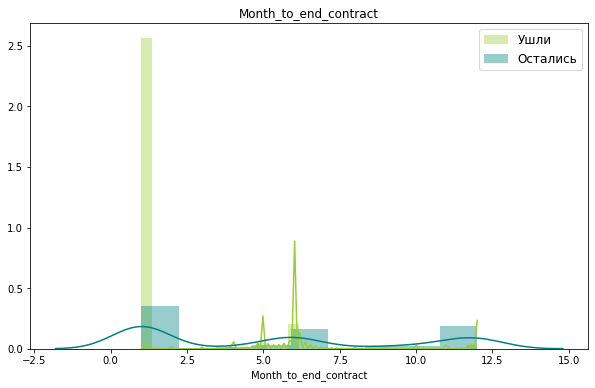

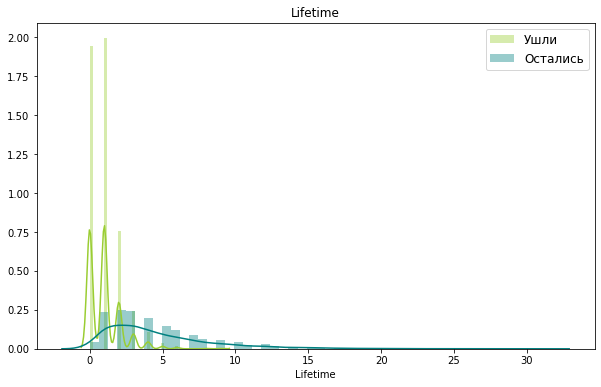

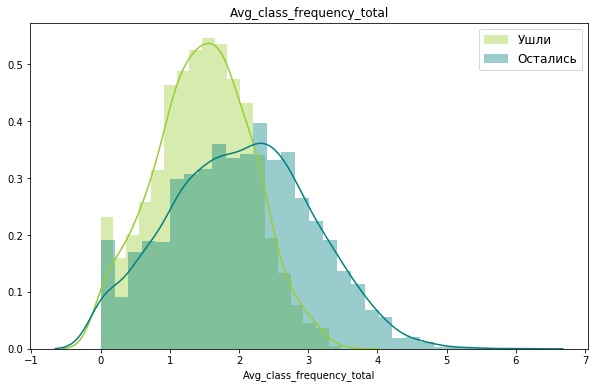

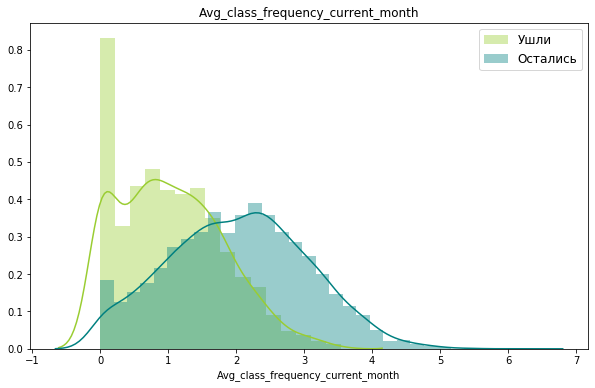

In [8]:
# построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
def _hist(i):
    df_one = df[df['Churn'] == 1]
    df_zero = df[df['Churn'] == 0]
    plt.figure(figsize = (10, 6))
    sns.distplot(df_one[i], color='yellowgreen')
    sns.distplot(df_zero[i], color='teal')
    plt.legend(labels=['Ушли', 'Остались'], fontsize = 12)
    plt.title(i, fontsize=12)
    
for i in list_columns[0:13]:
    _hist(i)

**Вывод:**  
  
Среди женщин и мужчин примерно одинаковый отток.  
  
Основной отток клиентов происходит среди тех кто:  
- живет дальше от клуба  
- пришел не из компании партнера  
- посещал клуб меньше 1 месяца  
  
В основном остаются те клиенты, которые:  
- в клубе уже примерно 6 месяцев  
- посещает групповые занятия  
- посещает занятия 2 раза в неделю  
  
Те, кто покинул клуб, тратили на дополнительные услуги меньше, чем те, кто остался.


######  Построим матрицу корреляций и отобразим ее

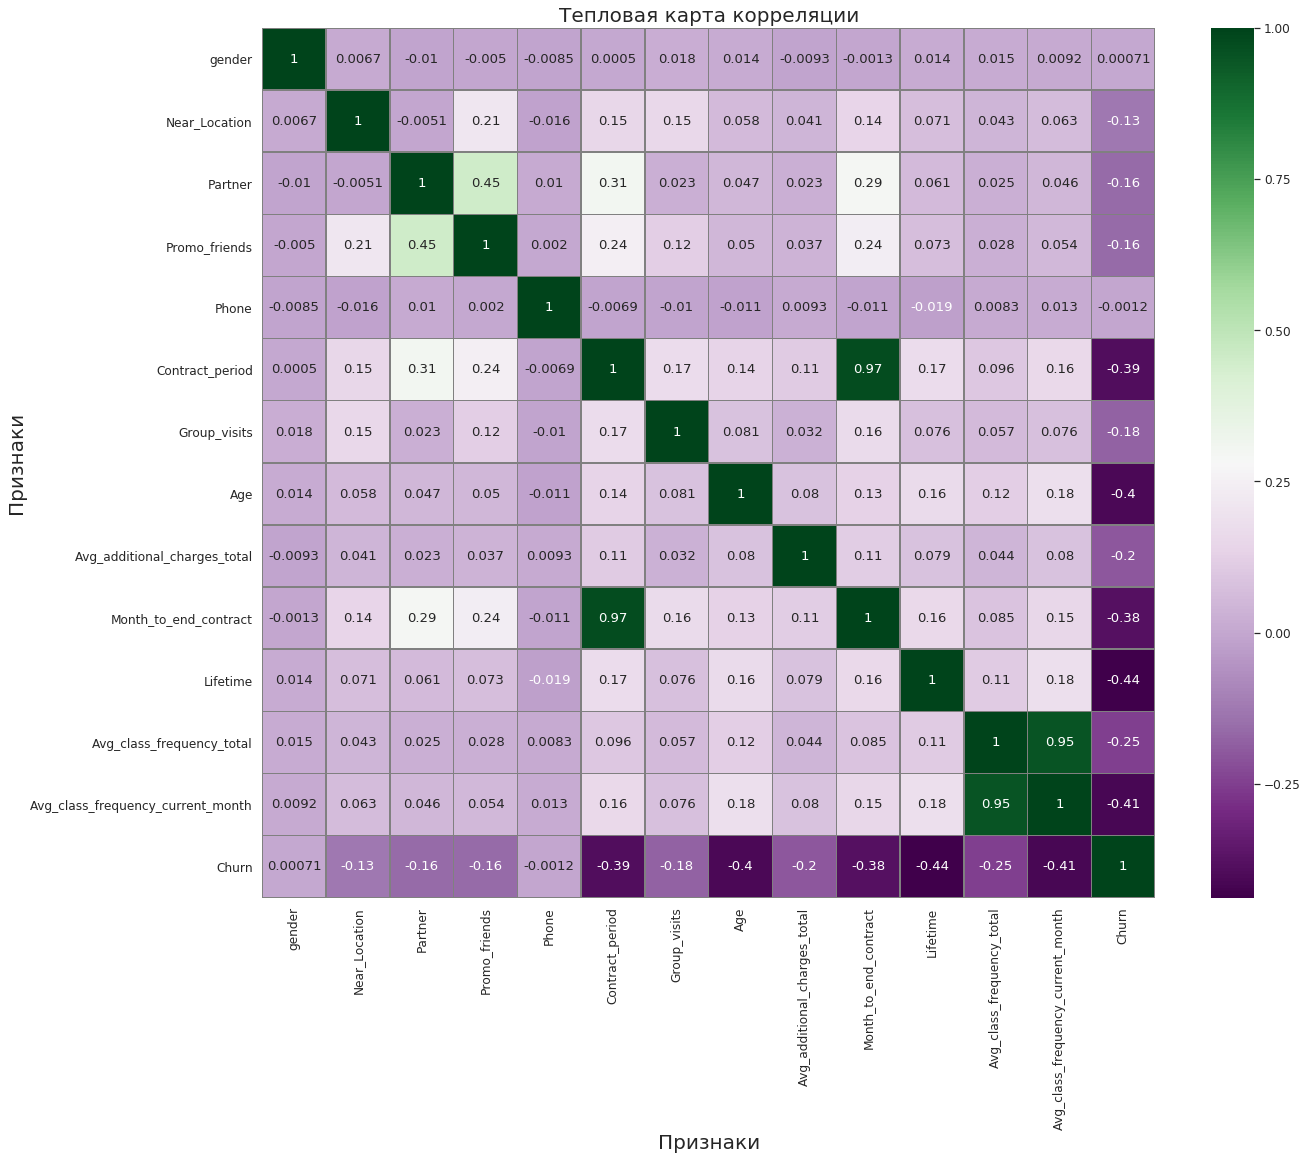

In [9]:
sns.set(font_scale=1.1)
corr_m = df.corr()
plt.figure(figsize = (20, 16))
sns.heatmap(corr_m,  annot = True, linewidths=.5, linecolor='grey', cmap="PRGn")
plt.title('Тепловая карта корреляции', fontsize = 20)
plt.xlabel('Признаки', fontsize = 20) 
plt.ylabel('Признаки', fontsize = 20) 
plt.show()

**Вывод:**    
Cильно коррелируют Month_to_end_contract и Contract_period (коэффициент корреляции Пирсона - 0.97) и  Avg_class_frequency_current_month и Avg_class_frequency_total (коэффициент корреляции Пирсона - 0.95).  
  
Корреляция срока до окончания текущего действующего абонемента и длительности текущего действующего абонемента вполне логична, как и корреляция средней частоты посещения в неделю за предыдущий месяц и средней частоты посещения в неделю за все время.  

##  Построим модель прогнозирования оттока клиентов

###### Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

In [10]:
# разобьем данные на обучающую и валидационную выборку функцией train_test_split().
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Обучим модель на train-выборке логистической регрессией

In [12]:
# зададим алгоритм для нашей модели
model = LogisticRegression(random_state=0)

# обучим модель
model.fit(X_train_st, y_train)

# воспользуйтесь уже обученной моделью, чтобы сделать прогнозы
predictions_log_reg = model.predict(X_test_st)
probabilities_log_reg = model.predict_proba(X_test_st)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Обучим модель на train-выборке случайным лесом 

In [13]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

**Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке.  
Сравним по ним модели. Какая модель показала себя лучше на основании метрик?    
Укажем параметр random_state при разделении выборки и задании алгоритма.** 

In [14]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации '):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [15]:
# выведем все метрики
print_all_metrics(y_test, predictions_log_reg, probabilities_log_reg, title = 'Метрики для модели логистической регрессии')

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


**Вывод:**    
Accuracy (доля правильных ответов) и ROC_AUC (площадь под кривой) одинаковы для обоих методов.  
Precision (точность), Recall (полнота) и F1-score (совместная оценка точности и полноты) верных ответов выше у логистической регрессии.  
Модель логистической регрессии в данном случае дает более корректный прогноз.

## Сделаем кластеризацию клиентов

**Стандартизируем данные** 

In [16]:
scaler = StandardScaler() 
df_drop_sc = scaler.fit_transform(df.drop(columns = ['Churn']))

**Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.  
На основании полученного графика предположим, какое количество кластеров можно выделить.**  

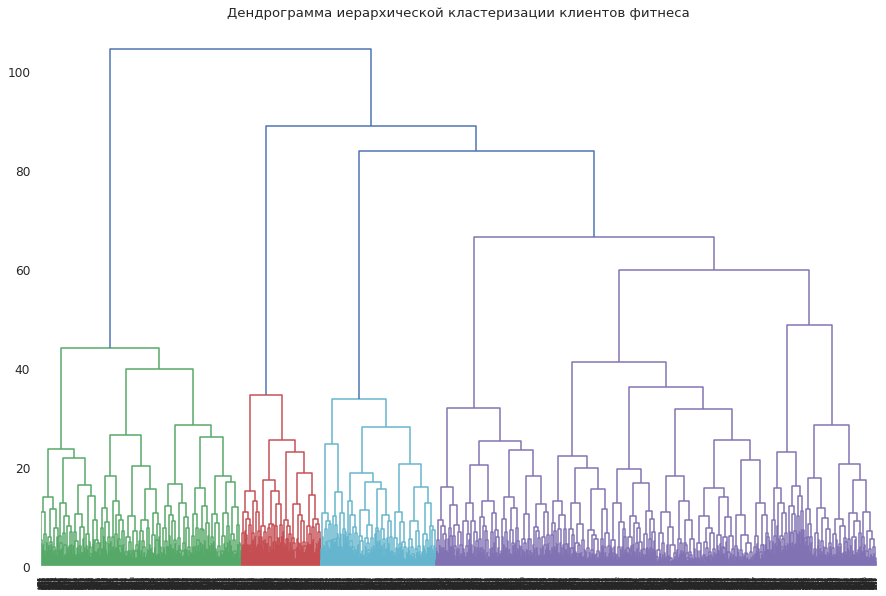

In [17]:
linked = linkage(df_drop_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма иерархической кластеризации клиентов фитнеса')
plt.show()

На дендрограмме цветом выделено 4 кластера, но примем за число кластеров 5, как указано в задании.

**Обучим модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов**     

In [18]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(df_drop_sc)
df['cluster_km'] = labels
display(df.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,2
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,4


**Изучим средние значения признаков для кластеров.  
Можно ли сразу что-то заметить?**  

In [19]:
df_mean_avg = df.groupby('cluster_km').mean()
df_mean_avg = df_mean_avg.transpose()
df_mean_avg.columns = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']
display(df_mean_avg)

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
gender,0.494505,0.587927,0.486074,0.501066,0.486739
Near_Location,0.000000,0.972441,1.000000,0.944563,1.000000
Partner,0.465201,0.263780,0.243486,0.743070,0.817473
Promo_friends,0.076923,0.095801,0.017969,0.488273,1.000000
Phone,0.915751,0.902887,0.902965,0.899787,0.900156
Contract_period,2.225275,2.835958,1.990117,11.865672,3.126365
Group_visits,0.214286,0.480315,0.319856,0.552239,0.455538
Age,28.478022,30.215223,28.194969,29.939232,29.173167
Avg_additional_charges_total,134.126172,162.209416,131.098930,164.797798,141.099849
Month_to_end_contract,2.089744,2.606299,1.906559,10.855011,2.901716


**Вывод:**  
Самая большая доля оттока в Кластере 0, а самая маленькая доля оттока - в Кластере 2.  

**Построим распределения признаков для кластеров.  
Можно ли что-то заметить по ним?**  

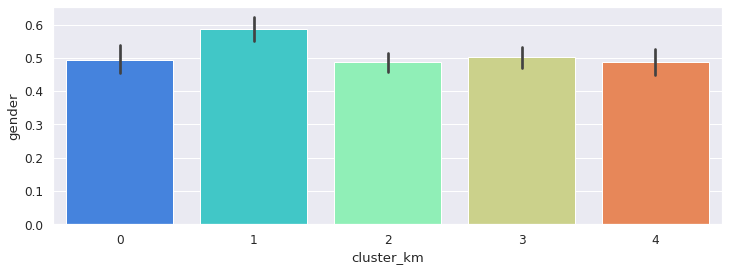

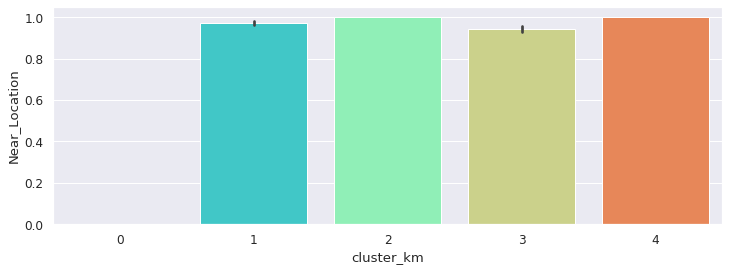

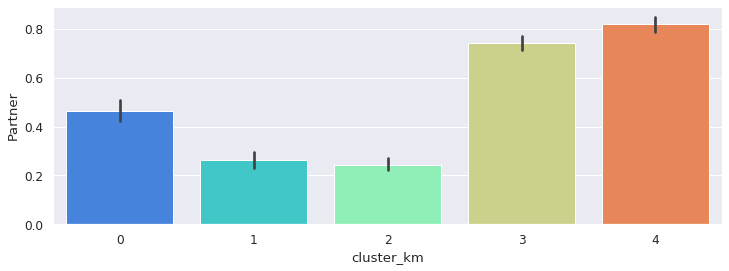

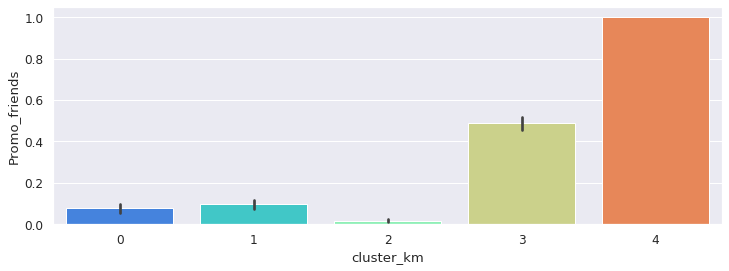

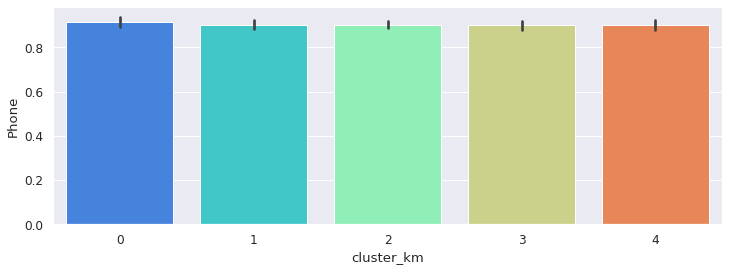

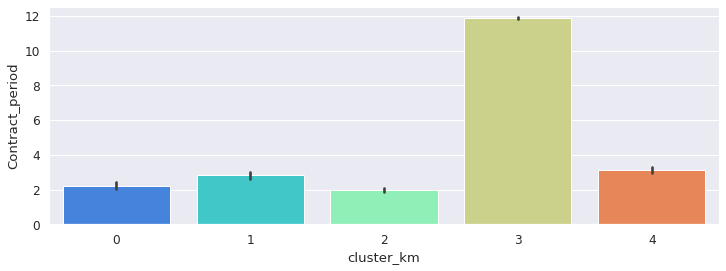

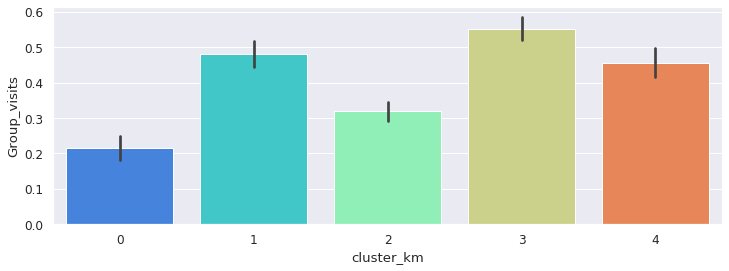

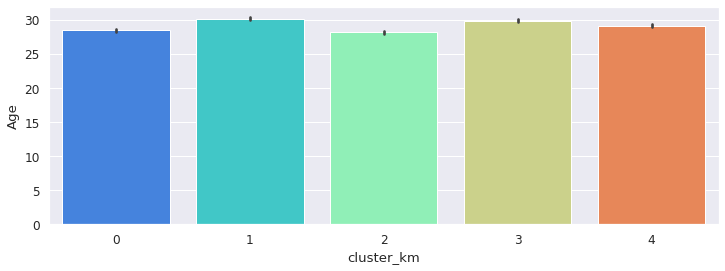

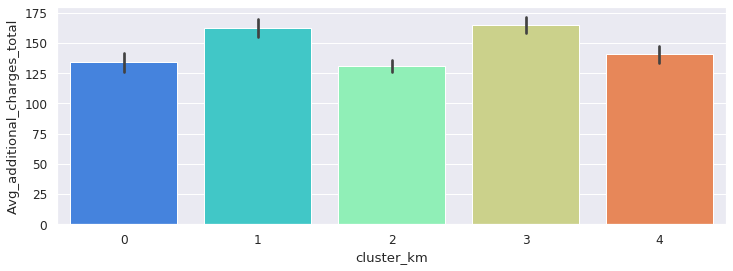

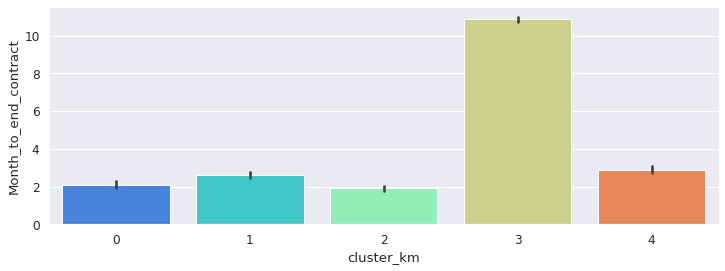

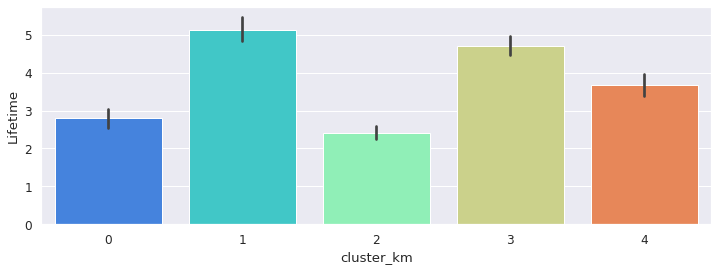

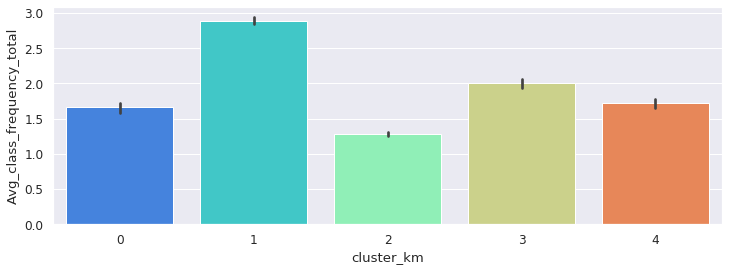

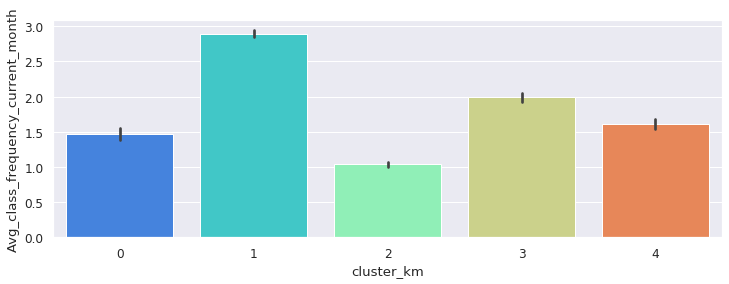

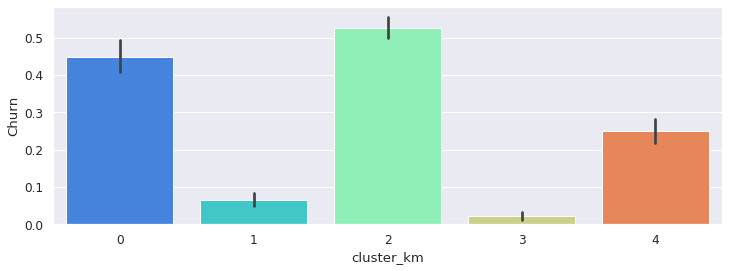

In [20]:
for col in list_columns:
    plt.figure(figsize=(12, 4))  
    sns.barplot(data=df, y=col, x='cluster_km', palette='rainbow')

**Для каждого полученного кластера посчитаем долю оттока.  
Отличаются ли они по доле оттока?  
Какие кластеры склонны к оттоку, а какие — надёжны?**  

In [21]:
display(df.groupby('cluster_km').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.494505,0.000000,0.465201,0.076923,0.915751,2.225275,0.214286,28.478022,134.126172,2.089744,2.805861,1.659607,1.469327,0.448718
1,0.587927,0.972441,0.263780,0.095801,0.902887,2.835958,0.480315,30.215223,162.209416,2.606299,5.136483,2.891558,2.892555,0.065617
2,0.486074,1.000000,0.243486,0.017969,0.902965,1.990117,0.319856,28.194969,131.098930,1.906559,2.415993,1.280967,1.040611,0.525606
3,0.501066,0.944563,0.743070,0.488273,0.899787,11.865672,0.552239,29.939232,164.797798,10.855011,4.702559,1.999829,1.991309,0.022388
4,0.486739,1.000000,0.817473,1.000000,0.900156,3.126365,0.455538,29.173167,141.099849,2.901716,3.670827,1.723885,1.615882,0.249610


In [22]:
for clast in range(0, 5):
    df_int = df.loc[df['cluster_km'] == clast, ['Churn']]
    df_int_avg = round(df_int.loc[df_int['Churn'] == 1].shape[0]/df_int.shape[0]*100, 2)
    print('Доля оттока посетителей в кластере', clast, '-', df_int_avg, '%')

Доля оттока посетителей в кластере 0 - 44.87 %
Доля оттока посетителей в кластере 1 - 6.56 %
Доля оттока посетителей в кластере 2 - 52.56 %
Доля оттока посетителей в кластере 3 - 2.24 %
Доля оттока посетителей в кластере 4 - 24.96 %


In [23]:
# посчитаем долю каждого кластера от общего обьема
for clast_part in range(0, 5):
    df_int_part = round(df[df['cluster_km'] == clast_part].shape[0]/df.shape[0]*100, 2)
    print('Доля кластера', clast_part, '-', df_int_part, '%')

Доля кластера 0 - 13.65 %
Доля кластера 1 - 19.05 %
Доля кластера 2 - 27.82 %
Доля кластера 3 - 23.45 %
Доля кластера 4 - 16.02 %


**Вывод:**  
Надежными по проценту оттока можно назвать кластеры 2 (2,2%) и 4 (9%).  
К оттоку склонны кластеры 0 (57%), 3 (26,68%) и 1 (24,64%).  
  
**Особенности кластеров:**  
  
**Кластер 0:**  
- самый большой по количеству посетителей кластер 
- самый большой процент оттока посетителей  
- наименьший средний возраст посетителей  
- наименьшая суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон  
- меньше всего посетителей пришло по акции "Приведи друга"  
- самая короткая длительность текущего действующего абонемента  
- самый короткий срок до окончания текущего действующего абонемента  
- наименьшая средняя частота посещений в неделю за предыдущий месяц  
  
**Кластер 1:**  
- больше всего посетителей пришло по акции "Приведи друга"  
- больше всего сотрудников компании-партнёра клуба  
- больше всего проживающих или работающих в районе, где находится фитнес-центр  
  
**Кластер 2:**  
- самый маленький процент оттока посетителей  
- наибольшая длительность текущего действующего абонемента  
- самый длительный срок до окончания текущего действующего абонемента  
- наибольшая суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон  
- самое большое количество посещений групповых занятий  
  
**Кластер 3:**  
- наименьший по количеству посетителей кластер  
- отсутствие телефонов клиентов  
- предпоследнее место по количеству посещений групповых занятий  
  
**Кластер 4:**  
- самый большой средний возраст  
- самое длительное время с момента первого обращения в фитнес-центр  
- самая большая средняя частота посещений в неделю за все время с начала действия абонемента  
- самая большая средняя частота посещений в неделю за предыдущий месяц  


## Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами.

**Выводы:**
  
- Среди женщин и мужчин примерно одинаковый отток.  
- Основной отток клиентов происходит среди тех кто: живет дальше от клуба, пришел не из компании партнера, посещал клуб меньше 1 месяца  

- В основном остаются те клиенты, которые: в клубе уже примерно 6 месяцев, посещает групповые занятия, посещает занятия 2 раза в неделю  
- Те кто покинул клуб, тратили на дополнительные услуги меньше, чем те, кто остался.
- Самый большой по количеству посетителей кластер имеет самый большой процент оттока клиентов, а так же самый маленький средний возраст посетителей, наименьшую суммарную выручку от других услуг фитнес-центра, меньше всего посетителей пришедших по акции "Приведи друга", самую короткую длительность текущего действующего абонемента, самый короткий срок до окончания текущего действующего абонемента, наименьшую среднюю частоту посещений в неделю за предыдущий месяц  
- Самый маленький процент оттока посетителей имеет кластер с наибольшей длительностью текущего действующего абонемента, самый длительный срок до окончания текущего действующего абонемента, наибольшую суммарную выручку от других услуг фитнес-центра, самое большое количество посещений групповых занятий  
- Кластер с самым маленьким средним возрастом имеет самый высокий процент оттока, а кластер с самым большим средним возрастом показывает небольшой отток клиентов (предпоследнее место по оттоку) - вероятно, люди более старшего возраста ходят в спортзал более дисциплинорованно, но разброс в возрасте небольшой, можно проверить предположение другим способом   
- В кластере с самым большим процентом оттока посетителей меньше всего посетителей пришло по акции "Приведи друга" - возможно, людям легче поддерживать мотивацию, когда они ходят в спортзал за компанию с кем-то  
- Модель логистической регрессии в данном случае дает более корректный прогноз - ее можно использовать в дальнейшем для прогнозирования и уменьшения оттока  
  
**Рекомендации:**
  
- Размещать объявления о фитнес-клубе в районе его расположения, настроить геотаргет    
- Брать номера телефонов у всех посетителей, чтобы иметь возможность присылать актуальные новости и персональные предложения    
- Разработать стратегию по привлечению клиентов старше 30 лет (например, таргетированная реклама)  
- Актуализировать и расширить акцию "Приведи друга"  
- Возможно, необходимо углубить сегментацию для кластеров с наиболее высоким процентом оттока для выявления большего количества причин  
- Стимулировать клиентов на большее количество посещений в неделю, чтобы способствовать выработке привычки  
